In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Idenditfy the nearest city for each latitude and longitude combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

616

In [6]:
# import requests library
import requests

# import API key
from config import weather_api_key

# import datetime
from datetime import datetime

In [7]:
# base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [8]:
# Create empy list for data
city_data = []
# Print beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL w/ city
    city_url = url + city.replace(" ", "+") + "&units=imperial" + "&appid=" + weather_api_key
    
    # Log the URL, record, and set numbers and the city 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    # Run an AP request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out needed datat
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city info
        city_data.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})
        
    # If there's an error, skip the city
    except:
        print("City not foud. Skipping...")
        pass

# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mafinga
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | marcona
City not foud. Skipping...
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | comodoro rivadavia
Processing Record 11 of Set 1 | thunder bay
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | waitati
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | patan
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | arlit
Processing Record 20 of Set 1 | nizhneyansk
City not foud. Skipping...
Processing Record 21 of Set 1 | cockburn town

Processing Record 38 of Set 4 | port macquarie
Processing Record 39 of Set 4 | itaituba
Processing Record 40 of Set 4 | lazarev
Processing Record 41 of Set 4 | sakakah
Processing Record 42 of Set 4 | korla
Processing Record 43 of Set 4 | baicheng
Processing Record 44 of Set 4 | saint-joseph
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | lotofaga
Processing Record 47 of Set 4 | kosino
Processing Record 48 of Set 4 | warqla
City not foud. Skipping...
Processing Record 49 of Set 4 | ilinskiy
Processing Record 50 of Set 4 | camana
Processing Record 1 of Set 5 | shimoda
Processing Record 2 of Set 5 | cortez
Processing Record 3 of Set 5 | seoul
Processing Record 4 of Set 5 | ossora
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | burica
City not foud. Skipping...
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | arkalokhorion
City not foud. Skipping...
Processing Record 9 of Set 5 | cabra
Processing Record 10 of Set 5 | tasiil

Processing Record 31 of Set 8 | romny
Processing Record 32 of Set 8 | litoral del san juan
City not foud. Skipping...
Processing Record 33 of Set 8 | palasa
Processing Record 34 of Set 8 | thongwa
Processing Record 35 of Set 8 | quesnel
Processing Record 36 of Set 8 | adrar
Processing Record 37 of Set 8 | lavrentiya
Processing Record 38 of Set 8 | caernarfon
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | longyearbyen
Processing Record 41 of Set 8 | ixtapa
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | elizabeth city
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | asosa
Processing Record 47 of Set 8 | matagami
Processing Record 48 of Set 8 | road town
Processing Record 49 of Set 8 | kuytun
Processing Record 50 of Set 8 | vila velha
Processing Record 1 of Set 9 | sompeta
Processing Record 2 of Set 9 | marsh harbour
Processing Record 3 of Set 9 | zhigalovo
Processing Re

Processing Record 22 of Set 12 | verkhnevilyuysk
Processing Record 23 of Set 12 | altay
Processing Record 24 of Set 12 | marsabit
Processing Record 25 of Set 12 | hedaru
Processing Record 26 of Set 12 | gurskoye
City not foud. Skipping...
Processing Record 27 of Set 12 | medina
Processing Record 28 of Set 12 | yurla
Processing Record 29 of Set 12 | praia da vitoria
Processing Record 30 of Set 12 | lakselv
Processing Record 31 of Set 12 | ararangua
Processing Record 32 of Set 12 | louisbourg
City not foud. Skipping...
Processing Record 33 of Set 12 | imeni poliny osipenko
Processing Record 34 of Set 12 | mackenzie
Processing Record 35 of Set 12 | bathsheba
Processing Record 36 of Set 12 | ballitoville
Processing Record 37 of Set 12 | paamiut
Processing Record 38 of Set 12 | stendal
Processing Record 39 of Set 12 | billings
Processing Record 40 of Set 12 | dolbeau
City not foud. Skipping...
Processing Record 41 of Set 12 | clarence town
Processing Record 42 of Set 12 | dryden
Processing 

In [9]:
# Convert array of dictionaries to Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mafinga,TZ,2021-04-24 00:17:11,-7.2500,35.0667,63.21,79,28,4.05
1,Mataura,NZ,2021-04-24 00:17:11,-46.1927,168.8643,55.00,81,76,3.00
2,Mar Del Plata,AR,2021-04-24 00:15:30,-38.0023,-57.5575,69.01,88,75,6.91
3,Hermanus,ZA,2021-04-24 00:16:27,-34.4187,19.2345,55.00,90,85,1.01
4,Norman Wells,CA,2021-04-24 00:17:12,65.2820,-126.8329,33.80,37,75,14.97
5,Ushuaia,AR,2021-04-24 00:17:13,-54.8000,-68.3000,42.80,93,75,10.36
6,Busselton,AU,2021-04-24 00:15:59,-33.6500,115.3333,64.00,72,95,1.99
7,Ribeira Grande,PT,2021-04-24 00:17:13,38.5167,-28.7000,58.51,78,49,28.21
8,Comodoro Rivadavia,AR,2021-04-24 00:17:13,-45.8667,-67.5000,50.00,81,0,4.61
9,Thunder Bay,CA,2021-04-24 00:16:52,48.4001,-89.3168,53.60,50,40,13.80


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

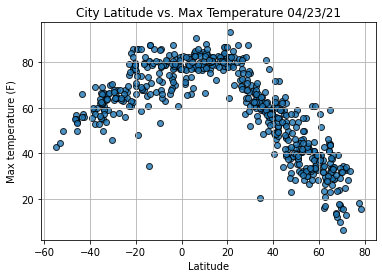

In [16]:
# Import time module
import time
# Build scatter plot for latitude vs max temp
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph formatting
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig('weather_data/Fig1.png')

# Show the plot
plt.show()

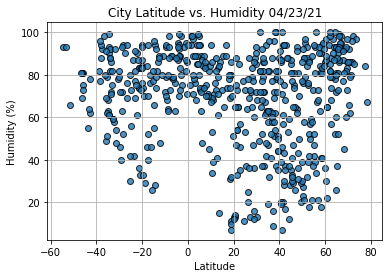

In [17]:
# Build scatter plot for latitude vs humidity
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph formatting
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig('weather_data/Fig2.png')

# Show the plot
plt.show()

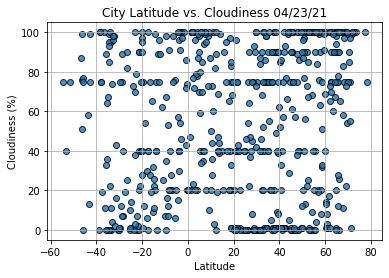

In [18]:
# Build scatter plot for latitude vs cloudiness
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph formatting
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig('weather_data/Fig3.png')

# Show the plot
plt.show()

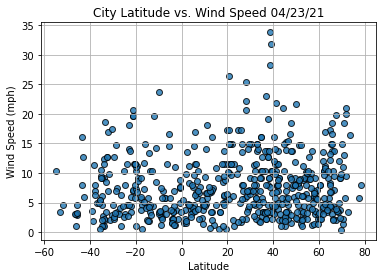

In [19]:
# Build scatter plot for latitude vs wind speed
plt.scatter(lats, 
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph formatting
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig('weather_data/Fig4.png')

# Show the plot
plt.show()

In [20]:
# import linear regression from SciPy stats
from scipy.stats import linregress

In [39]:
# Create a function to create/perform linear regression on weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equ of line
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for line eq
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City                    Tuatapere
Country                        NZ
Date          2021-04-24 00:17:14
Lat                      -46.1333
Lng                       167.683
Max Temp                       55
Humidity                       81
Cloudiness                     99
Wind Speed                      3
Name: 13, dtype: object

In [41]:
# Filter dataframe to separate northern and southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

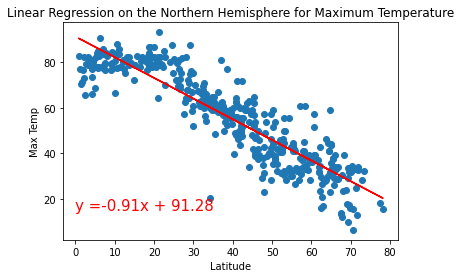

In [44]:
# Linear regression on Northern Hemishpere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,15))

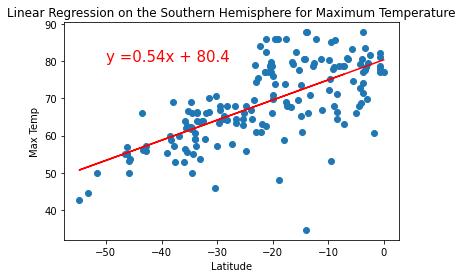

In [46]:
# Linear regression on Southern Hemishpere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

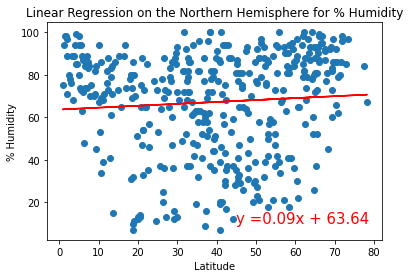

In [47]:
# Northern Hemi humidity linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

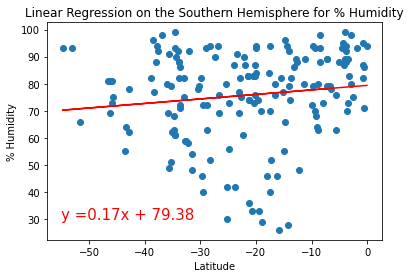

In [50]:
# Southern Hemi humidity linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,30))

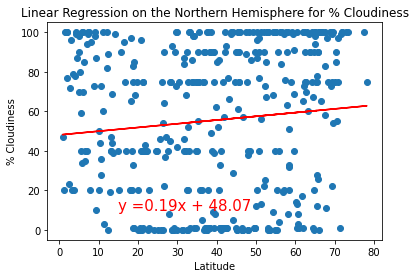

In [52]:
# Northern Hemi cloudiness linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(15,10))

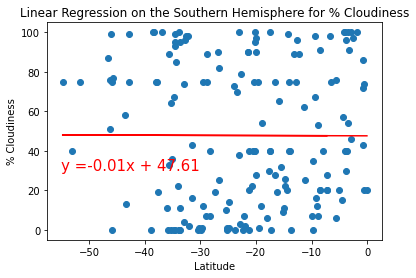

In [53]:
# Southern Hemi cloudiness linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,30))

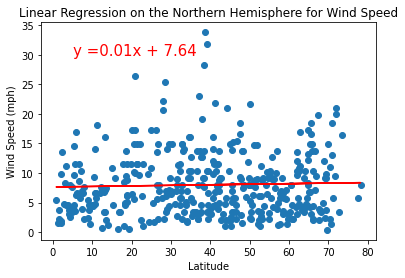

In [56]:
# Northern Hemi wind speed linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(5,30))

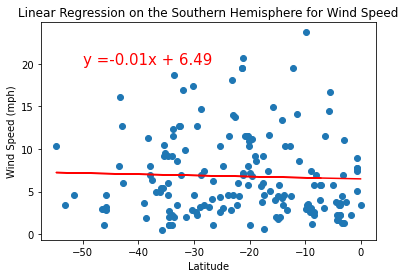

In [58]:
# Southern Hemi cloudiness linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)',(-50,20))